# 1. Importing libraries and loading data

In [100]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import time

In [101]:
print('loading the dataset')

df = pd.read_csv('hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

print("\nDimension check: ")
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: "+ str(y_test.shape) + "\n")



loading the dataset
Split into Train and Test
Scaling all to [0, 1]

Dimension check: 
X_train: (100, 49)
y_train: (100,)
X_test: (100, 49)
y_test: (100,)



In [102]:
def load_and_split():
    #Loading the dataset
    print('loading the dataset')
    
    df = pd.read_csv('hw1-data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_and_split()
print("\nDimension check: ")
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: "+ str(y_test.shape))

loading the dataset
Split into Train and Test

Dimension check: 
X_train: (100, 48)
y_train: (100,)
X_test: (100, 48)
y_test: (100,)


# 2. Linear Regression

# 2.1 Feature Normalization
1. Modify function  <font face="Courier New">feature_normalization</font> to normalize all the features to [0, 1]. 

> <b>Solution:</b>

> For any given instance $x_{i, j}$ in the training data (where $i$ is the training example number and $j$ is the feature number), we can use min-max scaling as follows:

> $x_{i, j} = \frac{x_{i, j} - j_{max}}{j_{max}-j_{min}}$

> Here, $j_{max}$ and $j_{min}$ are the maximum and minimum values encountered for feature $j$.

> This scaling can be executed in matrix form as follows:

> $X_{i,: \ normalized} = ({X_{i,:} - X_{min}}) \quad  ./ \quad ({X_{max} - X_{min}})$  ($./$ denotes element-wise division of two vectors)

> for every row i = 1, 2,.., n in X. Here, $X_{min}$ and $X_{max}$ are vectors where the $k_{th}$ element is the maximum / minimum value encountered in the training set for feature $k$.

> Note: we use Numpy broadcasting in the function implementing this.

In [103]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    min_features_vector = np.min(train,axis=0)
    max_features_vector = np.max(train,axis=0)
    
    #important: train and test have dimension (100,48), and min_features_vector and max_features_vector have  
    # dimension (48,). So, the numerator subtraction is each row of test/train minus min_features_vector, and 
    # the division is between a (100, 48) matrix and a (48, ) vector is element wise divison. This is the 
    # "numpy broadcasting" feature
#     print(train.shape)
#     print(test.shape)
#     print(min_features_vector.shape)
#     print(max_features_vector.shape)
    
    return ( train - min_features_vector ) / ( max_features_vector - min_features_vector ), \
            (test - min_features_vector )/( max_features_vector - min_features_vector) 
    




print("Scaling all to [0, 1]")
X_train_norm, X_test_norm = feature_normalization(X_train, X_test) #without bias term

Scaling all to [0, 1]


# 2.2 Gradient Descent Setup
1.Write the objective function $J(\theta)$ as a matrix/vector expression, without using an explicit summation sign.

> <b>Solution:</b>
$J(\theta) = \frac{1}{2m} ||X \theta - \vec{y}||_2^2$



2.Write down an expression for the gradient of $J$.

> <b>Solution:</b>

> Note: the notation followed here is: $x^{(i)}$ denotes the $i^{th}$ training example/vector, and $x^{(i)}_j$ denotes the $j^{th}$ feature of $x^{(i)}$ There are $m$ training example and $n$ features in each training example.

> $\nabla_{\theta}J(\theta)$ is the gradient of $J$; the gradient is a vector, whose $i^{th}$ element is $\frac{\partial J(\theta)}{\partial \theta_i}$

>$\nabla J(\theta)  = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}   \newline \frac{\partial J(\theta)}{\partial \theta_1}   \newline \vdots   \newline \frac{\partial J(\theta)}{\partial \theta_n} \end{bmatrix}$

>The $j^{th}$ component of the gradient is the summation of the product of two terms:

>$\begin{align*}
\; &\frac{\partial J(\theta)}{\partial \theta_j} &=&  \frac{1}{m} \sum\limits_{i=1}^{m}  \left(h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \newline
\; & &=& \frac{1}{m} \sum\limits_{i=1}^{m}   x_j^{(i)} \cdot \left(h_\theta(x^{(i)}) - y^{(i)}  \right) \newline
\;& &=& \frac1m  \vec{x_j}^{T} (X\theta - \vec{y}) \newline\end{align*}$ 

>Thus, the partial derivative w.r.t $\theta_j$ is $\frac{1}{m}$ times the transpose of the vector that has the $j^{th}$ feature for all training examples, multiplied by $X \theta - \vec{y}$. 

>The entire gradient vector is obtained by replacing $\vec{x_j}^{T}$ by $X^T$.

>$\begin{align*}
\; &\nabla J(\theta) & = & \frac 1m X^{T} (X\theta - \vec{y}) \newline\end{align*}$




3.Use the gradient to write down an approximate expression for $J(\theta+\eta\Delta)-J(\theta)$

> <b>Solution:</b>

> $J(\theta+\eta\Delta)-J(\theta)$

> $\approx \nabla_\theta J(\theta)^T (\theta + \eta\Delta-\theta)$

> $= \nabla_\theta J(\theta)^T \eta\Delta$


4.Write down the expression for updating $\theta$ in the gradient descent algorithm. Let $\eta$ be the step size.

> <b>Solution:</b>

> For any $\theta_j$, the update equation is 
> $\theta_j = \theta_j - \eta \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$ for j := 0..n

> In matrix form, this can be expressed as 
> $\theta = \theta-\eta\nabla_{\theta}J$

5.Modify the function `compute_square_loss`, to compute $J(\theta)$ for a given $\theta$.

In [104]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    #refer 2.2 - 1 for formula
    #res1 corresponds to X * theta - y
    res1 = np.dot(X, theta) - y
    #res2 is the squared two-norm of res1. Can be easily expressed as res1-transpose * res1
    res2 = np.dot(np.transpose(res1), res1)
    loss = (1/(2 * X.shape[0])) * res2 
    return loss

5 (contd.).You might want to create a small dataset for which you can compute $J(θ)$ by hand, and verify that your
<font face='Courier New'>compute_square_loss</font> function returns the correct value.

In [105]:
X = np.array([[1,2],[1,3]])
y = np.array([1,1])
theta = np.array([1,1])
#result should be 3.25
print(compute_square_loss(X,y,theta))

3.25


6.Modify the function `compute_square_loss_gradient`, to compute $\nabla_{\theta}J(\theta)$.

In [106]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #refer 2.2 - 2 for formula
    #res1 corresponds to X * theta - y
    res1 = np.dot(X, theta) - y
    #res2 corresponds to X-transpose * res1
    res2 = np.dot(np.transpose(X), res1)
    #square_loss_gradient is res2 / m
    square_loss_gradient = res2 / X.shape[0]
    return square_loss_gradient

6 (contd.).You might want to create a small dataset for which you can compute $\nabla_{\theta}J(θ)$ by hand, and verify that your
<font face='Courier New'>compute_square_loss_gradient</font> function returns the correct value.

In [107]:
X = np.array([[1,2],[1,3]])
y = np.array([1,1])
theta = np.array([1,1])
#result should be [2.5, 6.5]
print(compute_square_loss_gradient(X,y,theta))

[ 2.5  6.5]


# 2.3 Gradient Checker

1.Complete the function <font face='Courier New'>grad_checker</font> according to the documentation given.

In [108]:
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4): 
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions: 
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1) 

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by: 
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error
    
    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    for i in range(len(approx_grad)):
        direction_one_hot = np.zeros(num_features)
        e_i = np.zeros(num_features)
        e_i[i] = 1
        
        approx_grad[i] = (compute_square_loss(X, y, theta + (e_i * epsilon)) - \
                        compute_square_loss(X, y, theta - (e_i * epsilon))) \
                        / (2 * epsilon)
        print(approx_grad[i])
            
    difference_vector = approx_grad - true_gradient
    euclidean_distance = np.linalg.norm(difference_vector, 2)
    print(euclidean_distance)
    return abs(euclidean_distance) < tolerance
    

In [109]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    true_gradient = gradient_func(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    for i in range(len(approx_grad)):
        direction_one_hot = np.zeros(num_features)
        e_i[i] = 1
        
        approx_grad[i] = (objective_func(X, y, theta + (e_i * epsilon)) - \
                        objective_func(X, y, theta - (e_i * epsilon))) \
                        / (2 * epsilon)
            
    difference_vector = approx_grad - true_grad
    euclidean_distance = np.linalg.norm(difference_vector, 2)
    return abs(euclidean_distance) < tolerance

# 2.4 Batch Gradient Descent

1.Complete <font face='courier new'>batch_gradient_descent</font>.

In [110]:
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run 
        check_gradient - a boolean value indicating whether checking the gradient when updating
        
    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features) 
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1) 
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.ones(num_features) #initialize theta
    
    theta_hist[0] = theta #sets top row of theta_hist to initial value of theta
    loss_hist[0] = compute_square_loss(X, y, theta)
    
    for i in range(1, num_iter+1):
        gradient = compute_square_loss_gradient(X, y, theta)
        theta = theta - ( alpha * gradient ) #element wise multiplication (broadcasting)
        theta_hist[i] = theta
        loss = compute_square_loss(X, y, theta)
        loss_hist[i] = loss
        if (check_gradient):
            check_result = grad_checker(X, y, theta)
            if (not check_result):
                print("Incorrect gradient calculation - exceeds tolerance")
                
    return loss_hist, theta_hist

2.Starting with a step-size of 0.1, try various different fixed step sizes to see which converges most quickly and/or which diverge. As a minimum, try step sizes 0.5, 0.1, .05, and .01. Plot the value of the objective function as a function of the number of steps for each step size. Briefly summarize your findings.

In [111]:
def plot_loss_wrt_step_sizes(X, y, step_sizes, y_scale="log", iterations=1000):
    for step_size in step_sizes:
        loss_hist, _ = batch_grad_descent(X, y, alpha=step_size, num_iter=iterations)
        plt.plot(loss_hist, label=step_size)
       
    plt.title("Square loss parametrized by step size")
    plt.ylabel('Square loss')
    plt.xlabel("Number of Steps")
    plt.yscale(y_scale)    
    plt.legend(title="Legend")
    plt.show()


loading the dataset
Split into Train and Test
Scaling all to [0, 1]


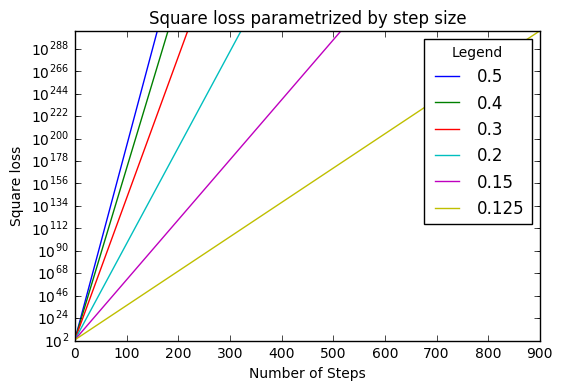

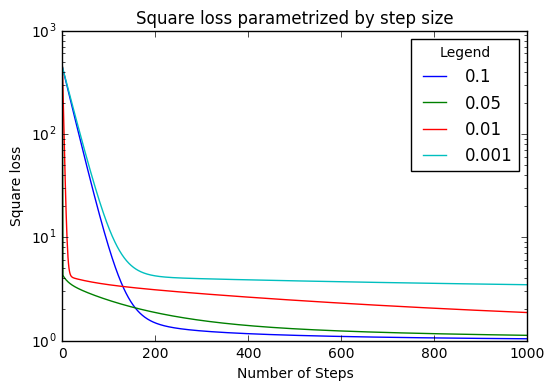

In [112]:
print('loading the dataset')

df = pd.read_csv('hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

step_sizes = [0.5, 0.4, 0.3, 0.2, 0.15, 0.125]
plot_loss_wrt_step_sizes(X_train, y_train, step_sizes)
step_sizes = [0.1, 0.05, 0.01, 0.001]
plot_loss_wrt_step_sizes(X_train, y_train, step_sizes)


> <b>Solution</b>

> Trying step sizes in the range of 0.5 down to 0.125 leads to divergence and increasing square loss fairly quickly (with slower divergence with decreasing step size). Step size of 0.1 converges, and converges fairly fast. All step sizes below this seem too slow.

# 2.5 Ridge Regression (i.e. Linear Regression with L2 regularization)

1.Compute the gradient of $J(\theta)$ and write down the expression for updating $\theta$ in the gradient
descent algorithm.

> <b>Solution:</b>

> The gradient of $J(\theta)$ here is the same as in 2.2 (2), with an extra added term $2\lambda\theta$.

>$\begin{align*}
\; &\nabla_\theta J(\theta) & = & \frac 1m X^{T} (X\theta - \vec{y}) + 2\lambda\theta \newline\end{align*}$

> For any $\theta_j$, the update equation is 
> $\theta_j = \theta_j - \lbrack\eta \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} + 2\lambda\theta_j\rbrack$ for j := 0..n

> In matrix form, this can be expressed as 
> $\theta = \theta-\eta\nabla_{\theta}J$

2.Implement compute regularized square loss gradient.

In [113]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #we simply use compute_square_loss_gradient from the unregularized algorithm, and add to it the extra term 
    # 2*lambda*theta. We can do this since the gradient is the same as the unregularized case, except the added term
    
    grad = compute_square_loss_gradient(X, y, theta) + (2 * lambda_reg * theta)
    return grad

3.Implement regularized grad descent.

In [114]:
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=10000, check_gradient=False):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run 
        
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features) 
        loss_hist - the history of regularized loss value, 1D numpy array
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X, y, theta)
    
    for i in range(1, num_iter+1):
        gradient = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta = theta - ( alpha * gradient ) #element wise multiplication (broadcasting)
        theta_hist[i] = theta
        loss = compute_square_loss(X, y, theta) #the penalty term is NOT included here
        loss_hist[i] = loss
        if (check_gradient):
            check_result = grad_checker(X, y, theta)
            if (not check_result):
                print("Incorrect gradient calculation - exceeds tolerance")
                
    return loss_hist, theta_hist
                
    

4.For regression problems, we may prefer to leave the bias term unregularized. One approach
is to change J(θ) so that the bias is separated out from the other parameters and left unregularized.
Another approach that can achieve approximately the same thing is to use a very
large number B, rather than 1, for the extra bias dimension. Explain why making B large decreases
the effective regularization on the bias term, and how we can make that regularization
as weak as we like (though not zero).

> <b>Solution</b>

> Taking $\theta_0$ to be the coeffieicnt of $B$, as $B\rightarrow\infty$, $\theta_0\rightarrow0$. Since the penalization is larger for a larger values of coefficient $\theta_i$, the penalization on a large bias term $B$ will decrease the effective regularization of the coefficient $\theta_0$.

7. Now fix B = 1. Choosing a reasonable step-size (or using backtracking line search), find the
$θ^∗_λ$ that minimizes $J(θ)$ over a range of λ. You should plot the training loss and the test loss
(just the square loss part, without the regularization, in each case) as a function of λ. Your
goal is to find λ that gives the minimum test loss. It’s hard to predict what λ that will be,
so you should start your search very broadly, looking over several orders of magnitude. For
example, $λ ∈ \{10^{−7}, 10{^−5}, 10{^−3}, 10{^−1}, 1, 10, 100\}$
. Once you find a range that works better,
keep zooming in. You may want to have log(λ) on the x-axis rather than λ.

In [115]:
def plot_loss_wrt_lambda(X_train, y_train, X_test, y_test, lambda_values, this_alpha=1e-5, iterations=1000, sc="linear"):
    training_loss = np.zeros(lambda_values.shape[0])
    test_loss = np.zeros(lambda_values.shape[0])
    
    for i, lambda_val in enumerate (lambda_values):
        loss_hist, theta_hist = regularized_grad_descent(X_train, y_train, alpha=this_alpha, lambda_reg = lambda_val, num_iter=iterations)
        training_loss[i] = compute_square_loss(X_train, y_train, theta_hist[-1])
        test_loss[i] = compute_square_loss(X_test, y_test, theta_hist[-1])
        
    
    if(sc=="log"):
        plt.plot(np.log(lambda_values), training_loss, label="training loss")
        plt.plot(np.log(lambda_values), test_loss, label="test loss")
    else:
        plt.plot(lambda_values, training_loss, label="training loss")
        plt.plot(lambda_values, test_loss, label="test loss")
        
    plt.ylabel("Loss")
    plt.xlabel("Lambda (" + sc + ")")
    plt.legend(title="Legend")
    plt.show()
    
    lambda_min_test_loss = lambda_values[np.argmin(test_loss)]
    print("Number of iterations: " + str(iterations))
    print("Lambda minimizing training loss: " + str(lambda_values[np.argmin(training_loss)]))
    print("Lambda minimizing test loss: " + str(lambda_min_test_loss))
    
    loss_hist, theta_hist = regularized_grad_descent(X_train, y_train, alpha=this_alpha, lambda_reg = lambda_min_test_loss, num_iter=iterations)
    index_least_loss = np.argmin(loss_hist)
    print("index of least loss " + str(index_least_loss))
    print("theta minimizing test loss " + str(theta_hist[index_least_loss]))
    

loading the dataset
Split into Train and Test
Scaling all to [0, 1]

Dimension check: 
X_train: (100, 49)
y_train: (100,)
X_test: (100, 49)
y_test: (100,)



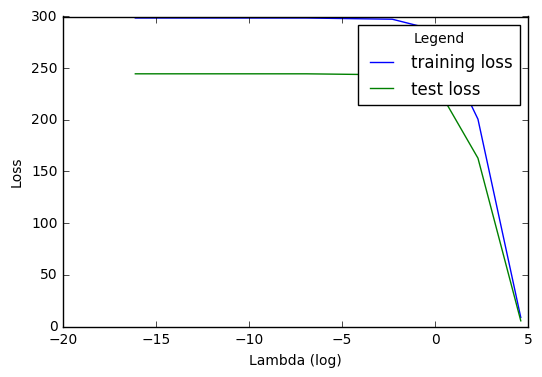

Number of iterations: 1000
Lambda minimizing training loss: 100.0
Lambda minimizing test loss: 100.0
index of least loss 1000
theta minimizing test loss [ 0.10267477  0.10388993  0.10493203  0.10543381  0.10541878  0.10603958
  0.10720932  0.10720932  0.1088023   0.11137787  0.11352851  0.1143337
  0.11719562  0.11938466  0.1258619   0.12708248  0.12946421  0.13412013
  0.10688599  0.10688599  0.10688599  0.10902415  0.10902415  0.10902415
  0.11099698  0.11099698  0.11099698  0.11191209  0.11191209  0.11191209
  0.11242016  0.11242016  0.11242016  0.12090838  0.12090838  0.12090838
  0.11784247  0.11784247  0.11784247  0.11604485  0.11604485  0.11604485
  0.11522786  0.11522786  0.11522786  0.11477936  0.11477936  0.11477936
  0.10228781]


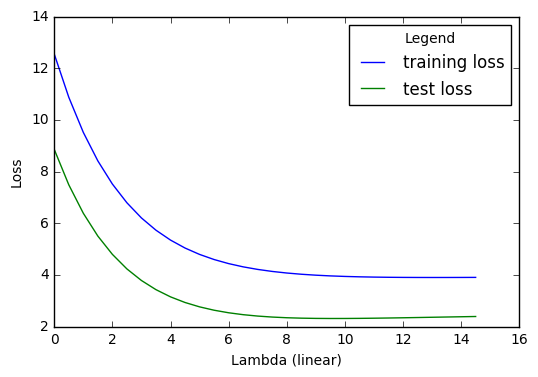

Number of iterations: 10000
Lambda minimizing training loss: 13.0
Lambda minimizing test loss: 9.5
index of least loss 10000
theta minimizing test loss [-0.02472478 -0.01421109 -0.00631793 -0.0030326  -0.00804476 -0.00454669
  0.00166149  0.00166149  0.01216492  0.02727824  0.03865399  0.03914011
  0.04988041  0.05920849  0.10282882  0.11061479  0.12267887  0.14506217
  0.00072844  0.00072844  0.00072844  0.01200621  0.01200621  0.01200621
  0.02242708  0.02242708  0.02242708  0.02726247  0.02726247  0.02726247
  0.02994755  0.02994755  0.02994755  0.07415592  0.07415592  0.07415592
  0.05858868  0.05858868  0.05858868  0.04909867  0.04909867  0.04909867
  0.04478436  0.04478436  0.04478436  0.04241549  0.04241549  0.04241549
 -0.02797857]


In [116]:
print('loading the dataset')

df = pd.read_csv('hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

print("\nDimension check: ")
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: "+ str(y_test.shape) + "\n")

lambda_values = np.array([1e-7, 1e-5, 1e-3, 1e-1, 1, 10, 100])
plot_loss_wrt_lambda(X_train, y_train, X_test, y_test, lambda_values, iterations=1000, sc="log")

lambda_values = np.arange(0, 15, 0.5)
plot_loss_wrt_lambda(X_train, y_train, X_test, y_test, lambda_values, iterations=10000)

8.What $\theta$ would you select for deployment and why?

> I would select the mean value of the parameters shown above, since this would lead to quick convergence.

# 2.6 Stochastic Gradient Descent

1.Write down the update rule for $\theta$ in SGD for the ridge regression objective function.

> <b>Solution:</b>

> The following notation is followed here:

> $\theta_{i+1}$ : vector parameters in iteration $i+1$

> $\theta_{i}$ : vector parameters in iteration $1$

> $x_i$ : single sample selected at iteration $i$ 

> $y_i$ : label corresponding to $x_i$

> $\eta$ : step size

> $m$ : number of training examples

> $\lambda$ : regularization parameter

> The update equation for $\theta$ is

> $\theta_{i+1} = \theta_{i} - \eta ( x_i ( \theta_{i} x_i - y_i ) + 2 \lambda \theta_{i}) $

2.Implement stochastic grad descent. (Note: You could potentially reuse the code you
wrote for batch gradient, though this is not necessary. If we were doing minibatch gradient
descent with batch size greater than 1, you would definitely want to use the same code.)

In [117]:
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    
    
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    
    point_sequence = list(range(num_instances))
    
    if isinstance(alpha, float):
        stepSize = alpha
    else:
        stepSize = 1
    
    global_counter = 1
    t0 = time.time()
    
    for i in range(num_iter):
        np.random.shuffle(point_sequence) #randomize the sequence of points
        for j in range(num_instances):
            theta_hist[i][j] = theta
            loss_hist[i][j] = compute_square_loss(X, y, theta)
            gradient =  np.dot( X[point_sequence[j]], np.dot(theta.T, X[point_sequence[j]]) - y[point_sequence[j]] ) + (2 * lambda_reg * theta)
#             gradient =  (np.dot(X[point_sequence[j]], theta.T) - y[point_sequence[j]]) * X[point_sequence[j]] + 2 * lambda_reg * theta
            if isinstance(alpha, str):
                if alpha == "1/t":
                    theta = theta - ( (1.0/global_counter) * gradient )
                elif alpha == "1/sqrt(t)":
                    theta = theta - ( (1.0/np.sqrt(global_counter)) * gradient )
            else:
                theta = theta - (alpha * gradient)
            global_counter += 1

    t1 = time.time()  
    avg_time = (t1 - t0) / num_iter
    print ("Avg. time per epoch: " + str(avg_time) + " seconds")
    return theta_hist, loss_hist

3.For each step size rule, plot the value of the objective function (or the log of the objective function
if that is more clear) as a function of epoch (or step number) for each of the approaches to step
size. How do the results compare?

4.Estimate the amount of time it takes on your computer for a single epoch of SGD.

Avg. time per epoch: 0.004372596740722656 seconds


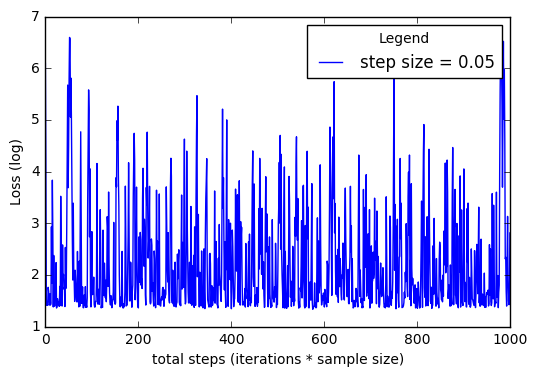

Avg. time per epoch: 0.0035633087158203126 seconds


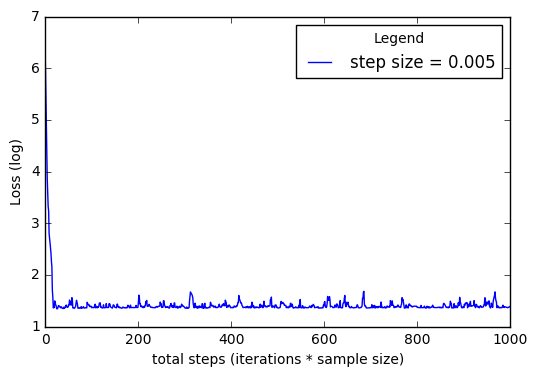

Avg. time per epoch: 0.004124999046325684 seconds


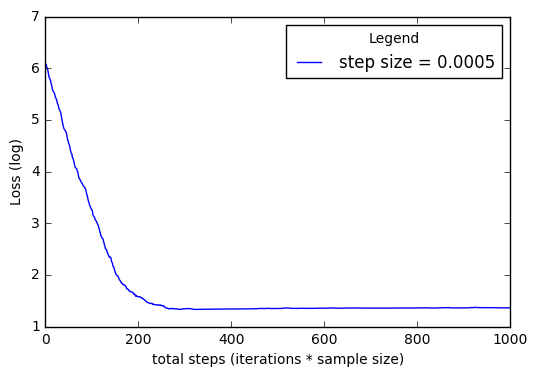

In [126]:
#fixed step size

lambda_val = 5 #using 0.01 as suggested in problem leads to somewhat higher loss values
step_sizes = [0.05, 0.005, 0.0005]

for step_size in step_sizes:
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=step_size, lambda_reg=lambda_val, num_iter=10)
    plt.plot(np.log(loss_hist.ravel()), label="step size = " + str(step_size))     
    plt.ylabel("Loss (log)")
    plt.xlabel("total steps (iterations * sample size)")
    plt.legend(title="Legend")
    plt.show()


Avg. time per epoch: 0.0031081581115722655 seconds


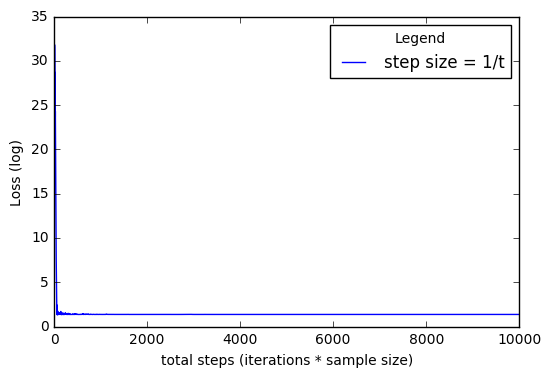

Avg. time per epoch: 0.002945559024810791 seconds


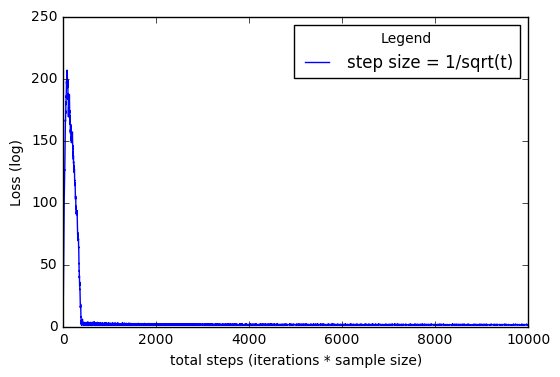

In [127]:
#decreasing step size

lambda_val = 5 #using 0.01 as suggested in problem, yields to loss converging at about 27
step_sizes = ["1/t", "1/sqrt(t)"]

for step_size in step_sizes:
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=step_size, lambda_reg=lambda_val, num_iter=100)
    plt.plot(np.log(loss_hist.ravel()), label="step size = " + str(step_size))     
    plt.ylabel("Loss (log)")
    plt.xlabel("total steps (iterations * sample size)")
    plt.legend(title="Legend")
    plt.show()


> <b>Solution</b>:

> A single epoch of SGD takes about $4\times10^{-3}$ seconds on my computer

5.Comparing SGD and gradient descent, if your goal is to minimize the total number of epochs
(for SGD) or steps (for batch gradient descent), which would you choose? If your goal were
to minimize the total time, which would you choose?

Avg. time per epoch: 0.0056008100509643555 seconds


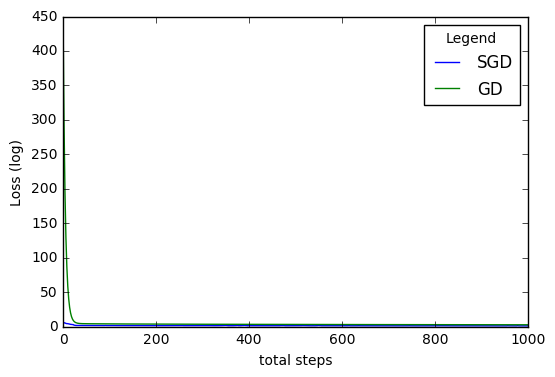

In [128]:
_, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.005, lambda_reg=0.01, num_iter=10)
plt.plot(np.log(loss_hist.ravel()), label="SGD")     
loss_hist, _ = regularized_grad_descent(X_train, y_train, alpha=0.005, lambda_reg = 0.01, num_iter=1000)
plt.plot(loss_hist, label="GD")     

plt.ylabel("Loss (log)")
plt.xlabel("total steps")
plt.legend(title="Legend")
plt.show()

> <b>Solution</b>

> It appears as if SGD takes more time, but SGD seems to converge faster than GD.